In [1]:
from mnist import MNIST
import numpy as np
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras import models, layers, Sequential
from keras import optimizers
import keras
import matplotlib.pyplot as plt

# Wget to save mnist train and test data under /nfs/Workspace/mndata/

mndata = MNIST('/nfs/Workspace/mndata/')
raw_train_images, raw_train_labels = mndata.load_training()


In [2]:
train_labels = np.array(raw_train_labels)
train_images = np.array(raw_train_images)

# Random select 50000 from taining set

rng = np.random.default_rng()
test_index = rng.choice(len(train_images), 10000, replace=False)
test_labels = []
test_images = []
# Get 10000 from training set for testing set
for index in test_index:
    test_labels.append(train_labels[index])
    test_images.append(train_images[index])

train_labels = np.delete(train_labels, test_index)
train_images = np.delete(train_images, test_index,axis=0)
test_labels = np.array(test_labels)
test_images = np.array(test_images)


print(len(test_index), train_labels.shape, train_images.shape)
print(len(test_index), test_labels.shape, test_images.shape)

10000 (50000,) (50000, 784)
10000 (10000,) (10000, 784)


In [3]:
# Reshape images data for training

train_images = train_images.reshape(-1, 28, 28,1)
print(train_images.shape, train_labels.shape)

test_images = test_images.reshape(-1, 28, 28, 1)
print(test_images.shape,test_labels.shape)


(50000, 28, 28, 1) (50000,)
(10000, 28, 28, 1) (10000,)


In [4]:
# Categorical labels
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

In [5]:
# Build batch-normalized model with 4 hidden layers and 10 neual 
bn_model = keras.models.Sequential()
bn_model.add(keras.layers.normalization.BatchNormalization(input_shape=(28, 28, 1),axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None))
bn_model.add(keras.layers.Dense(10, activation="relu"))
bn_model.add(keras.layers.Dense(10, activation="relu"))
bn_model.add(Flatten())
bn_model.add(keras.layers.Dense(10, activation="relu"))
bn_model.add(keras.layers.Dense(10, activation="relu"))
bn_model.add(keras.layers.Dense(10, activation="softmax"))
# optimizer use sgd (strogatic gradient descent)
bn_model.compile(loss="categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
bn_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
dense (Dense)                (None, 28, 28, 10)        20        
_________________________________________________________________
dense_1 (Dense)              (None, 28, 28, 10)        110       
_________________________________________________________________
flatten (Flatten)            (None, 7840)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                78410     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1

In [6]:
# Train batch-normalized 
# Use epochs 10
bn_history = bn_model.fit(train_images, train_labels, epochs=10, 
    batch_size=500, validation_data=(test_images, test_labels), 
    verbose=1, shuffle=True)

Epoch 1/10
100/100 [==============================] - 9s 29ms/step - loss: 2.1499 - accuracy: 0.2358 - val_loss: 1.7193 - val_accuracy: 0.3122
Epoch 2/10
100/100 [==============================] - 3s 25ms/step - loss: 1.6536 - accuracy: 0.3717 - val_loss: 1.3799 - val_accuracy: 0.5307
Epoch 3/10
100/100 [==============================] - 2s 20ms/step - loss: 1.2734 - accuracy: 0.5754 - val_loss: 0.9918 - val_accuracy: 0.6991
Epoch 4/10
100/100 [==============================] - 3s 30ms/step - loss: 0.9153 - accuracy: 0.7291 - val_loss: 0.7992 - val_accuracy: 0.7841
Epoch 5/10
100/100 [==============================] - 7s 70ms/step - loss: 0.7456 - accuracy: 0.8095 - val_loss: 0.6900 - val_accuracy: 0.8372
Epoch 6/10
100/100 [==============================] - 3s 30ms/step - loss: 0.6585 - accuracy: 0.8445 - val_loss: 0.6315 - val_accuracy: 0.8577
Epoch 7/10
100/100 [==============================] - 4s 36ms/step - loss: 0.6122 - accuracy: 0.8565 - val_loss: 0.5938 - val_accuracy: 0.8652

In [7]:
# Build regular model
rg_model = keras.models.Sequential()
rg_model.add(keras.layers.Dense(10, input_shape=(28, 28, 1), activation="relu"))
rg_model.add(keras.layers.Dense(10, activation="relu"))
rg_model.add(keras.layers.Dense(10, activation="relu"))
rg_model.add(Flatten())
rg_model.add(keras.layers.Dense(10, activation="relu"))
rg_model.add(keras.layers.Dense(10, activation="softmax"))
# optimizer use sgd (strogatic gradient descent) with learning rate 0.1
rg_model.compile(loss="categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
rg_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 28, 28, 10)        20        
_________________________________________________________________
dense_6 (Dense)              (None, 28, 28, 10)        110       
_________________________________________________________________
dense_7 (Dense)              (None, 28, 28, 10)        110       
_________________________________________________________________
flatten_1 (Flatten)          (None, 7840)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                78410     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
Total params: 78,760
Trainable params: 78,760
Non-trainable params: 0
__________________________________________________

In [8]:
# Train regular model
rg_history = rg_model.fit(train_images, train_labels, epochs=10, 
    batch_size=len(train_images), validation_data=(test_images, test_labels), 
    verbose=1, shuffle=True)

Epoch 1/10
1/1 [==============================] - 21s 21s/step - loss: 5.6134 - accuracy: 0.1104 - val_loss: 3.9521 - val_accuracy: 0.1034
Epoch 2/10
1/1 [==============================] - 1s 990ms/step - loss: 3.9376 - accuracy: 0.1041 - val_loss: 33.0030 - val_accuracy: 0.1002
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 32.7590 - accuracy: 0.1011 - val_loss: 2.2810 - val_accuracy: 0.1422
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 2.2816 - accuracy: 0.1366 - val_loss: 2.2513 - val_accuracy: 0.1545
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 2.2520 - accuracy: 0.1536 - val_loss: 2.1724 - val_accuracy: 0.2079
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 2.1810 - accuracy: 0.2021 - val_loss: 2.1355 - val_accuracy: 0.2311
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 2.1459 - accuracy: 0.2267 - val_loss: 2.1178 - val_accuracy: 0.2504
Epoch 8/10
1/1 [==================

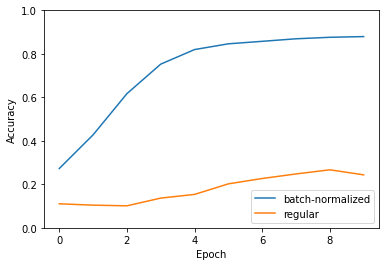

In [10]:
# Show traing accuracy only
plt.plot(bn_history.history['accuracy'], label='batch-normalized')
plt.plot(rg_history.history['accuracy'], label = 'regular')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

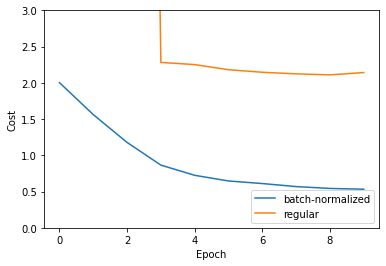

In [11]:
# Show traing cost only
plt.plot(bn_history.history['loss'], label='batch-normalized')
plt.plot(rg_history.history['loss'], label = 'regular')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.ylim([0.0, 3])
plt.legend(loc='lower right')